# 특성 선택

[sklearn.feature.selection](https://scikit-learn.org/stable/api/sklearn.feature_selection.html#module-sklearn.feature_selection) 모듈의 클래스들은 표본에 대해 정확도 점수를 높이기 위해서나 매우 고차원적인 데이터셋에 대한 성능을 높이기 위해 특성 선택이나 차원 축소를 위해 사용될 수 있다. 

## 분산이 낮은 특성 제거하기

[VarianceThreshold](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html#sklearn.feature_selection.VarianceThreshold)는 특성 선택의 간단한 접근법이다. 이것은 분산이 특정한 임계치를 넘지 않는 모든 특성들을 제거한다. 기본적으로 이 클래스는 분산이 0인, 즉 모든 표본에서 같은 값을 가진 것을 제거한다. 

예를 들어, 논리값 특성들을 가진 데이터셋에서 0이나 1이 표본의 80%를 넘는 특성들을 제거하고 싶다고 하자. 논리값 특성들은 베르누이 확률변수이고, 그러한 변수들의 분산은 
$$Var[x]=p(1-p)$$
로 정의된다.

그러므로 임계치를 0.8*(1-0.8)로 설정하면 된다.

In [1]:
from sklearn.feature_selection import VarianceThreshold
X=[
    [0,0,1],
    [0,1,0],
    [1,0,0],
    [0,1,1],
    [0,1,0],
    [0,1,1]
]
sel=VarianceThreshold(threshold=(.8*(1-.8)))
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

예상대로, VarianceThreshold는 $p=5/6>0.8$에 해당하는 양의 0을 포함한 첫 번째 열을 제거하였다.

## 단변량 특성 선택

단변량 특성 선택은 단변량 가설 검증에 기반해 최고의 특성을 선택하는 방식으로 작동한다. 이는 학습기(estimator)의 전처리 단계로 볼 수 있다. 사이킷런은 transform 메서드를 구현한 객체로 피처 선택 루틴을 제공한다.

|클래스 이름|기능|
|-----------|----|
|[SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest)|특정 점수를 기준으로 $k$등의 특성까지만 남기고 전부 제거한다.|
|[SelectPercentile](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html#sklearn.feature_selection.SelectPercentile)|특정 점수를 기준으로 사용자가 정의한 백분율 내의 특성만 남기고 전부 제거한다.|
|[SelectFpr](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFpr.html#sklearn.feature_selection.SelectFpr)|잘못된 양성 비율(False Positive rate)을 기반으로 피처를 선택한다. 여기서 잘못된 양성 비율은 중요한 피처가 아닌 피처를 잘못 선택할 확률을 의미한다.|
|[SelectFdr](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFdr.html#sklearn.feature_selection.SelectFdr)|잘못된 발견 비율(False discovery rate)을 조절하여 피처를 선택한다. 잘못된 발견 비율은 실제로 중요한 피처가 아닌 피처가 선택된 비율이다.|
|[SelectFwe](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFwe.html#sklearn.feature_selection.SelectFwe)|Family-wise error는 여러 테스트에서 하나 이상의 잘못된 양성 오류가 발생할 확률을 의미한다. 이 방법은 본페르니(Bonferroni) 교정을 사용하여 여러 테스트에서 잘못된 양성 오류가 발생할 확률을 조절한다.|
|[GenericUniveriateSelect](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.GenericUnivariateSelect.html#sklearn.feature_selection.GenericUnivariateSelect)|직접 구성 가능한 전략을 사용하여 단변량 피처 선택을 수행할 수 있게 해준다. 이를 통해 하이퍼파라미터 탐색 학습기(estimator)를 사용하여 최상의 단변량 선택 전략을 선택할 수 있다.(파이프라인 형성에 유용)

예를 들어, 아래와 같이 F-검정으로 두 개의 좋은 특성들을 이끌어낼 수 있다.

In [3]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [4]:
X_new = SelectKBest(f_classif, k=2).fit_transform(X, y)
X_new.shape

(150, 2)

이 객체들은 단변량 점수와 유의확률(p-value)을 반환하는 점수 계산 함수를 입력으로 받는다. 

- 회귀 문제: [r_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.r_regression.html#sklearn.feature_selection.r_regression)(피어슨 상관계수 기반), [f_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression)(F-검정 기반), [mutual_info_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html#sklearn.feature_selection.mutual_info_regression)(K-최근접 이웃 거리 기반)
- 분류 문제: [chi2](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.chi2)(카이제곱 검정 기반), [f_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html#sklearn.feature_selection.f_classif)(분산분석 기반), [mutual_info_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif)(K-최근접 이웃 기반)

F-검정 기반의 방법들은 두 확률변수 사시의 선형 종속성의 정도를 추정한다. 반면, 상호 정보(mutual information) 방법들은 어떤 종류의 통계적 종속성도 포착할 수 있지만, 비모수적 방법이기 때문에 정확한 추정을 위해 더 많은 표본을 필요로 한다. $\chi^{2}$-검정은 빈도수와 같은 음수가 아닌 특성에 적용되어야 한다는 것에 주의해야 한다.

## 재귀적 특성 제거

특성들에 가중치를 부여하는 외부 학습기가 주어졌을 때, 재귀적 특성 제거([RFE](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE)의 목표는 재귀적으로 점점 더 작은 특성 집합을 만들어서 특성을 선택하는 것이다. 먼저, 학습기는 처음 주어진 특성 집합에서 훈련되고 각 특성의 중요도가 관련된 어떤 특정한 속성(coef_ 나 feature_importance_ 같은 것) 또는 호출 가능 객체에 의해 얻어진다. 그러면 최소로 중요한 특성이 현재의 특성 집합에서 가지치기된다. 이 절차는 선택하길 윈하는 숫자의 특성에 도달할 때까지 가지치기된 집합에서 재귀적으로 반복된다.

[RFECV](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html#sklearn.feature_selection.RFECV)는 최적의 특성 개수를 찾기 위해 교차 검증 루프에서 RFE를 수행한다. 보다 구체적으로는, 서로 다른 교차 검증 분할에서 RFE 선택기를 적합시킴으로서 선택될 특성의 개수가 자동으로 조율된다. RFE 선택기의 성능은 서로 다른 목표 특성 개수에 대해 점수를 매기는 함수(scorer)를 사용해 평가되고 함께 묶여서 정리된다. 마지막으로 모든 폴드의 점수들의 평균이 구해지고 교차 검증 점수를 최대화하는 특성의 개수가 선택된다.

## SelectFromModel을 사용한 특성 선택

[SelectFromModel](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html#sklearn.feature_selection.SelectFromModel)은 적합 이후에 importance_getter 함수나 coef_, feature_importance_ 같은 특정 속성으로 각 특성에 중요도를 할당할 수 있는 어떤 학습기와도 사용될 수 있다. 어떤 특성의 대응되는 중요도가 지정된 threshold 매개변수 미만일 경우, 그 특성은 중요하지 않은 것으로 고려되어 제거된다. 임계치를 숫자로 지정하지 않아도, 문자열(string) 인수를 입력하여 적당한 임계치를 찾을 수 있는 내장 휴리스틱 기법들도 있다. 현재 사용 가능한 휴리스틱 기법들은 "mean", "median", 그리고 "0.1*mean"처럼 문자열 내에 float을 곱하는 것들이다. threshold 인수와 함께, 선택할 특성의 개수에 제한을 두기 위해 max_features 매개변수를 사용할 수 있다.

## L1-기반 특성 선택

L1 규제가 가해진[Linear models](https://scikit-learn.org/stable/modules/linear_model.html#linear-model)(선형 모형)들은 희소해를 가진다. 왜냐하면 그것들이 추정한 계수들은 대부분 0이기 때문이다. 목표가 다른 분류기에 사용할 데이터의 차원을 축소하는 것이라면, 선형 모형들은 계수가 0이 아닌 것들을 선택하기 위해 [SelectFromModel](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html#sklearn.feature_selection.SelectFromModel)과 함께 사용될 수 있다. 구체적으로, 이 목적을 위해 유용한 학습기로 회귀에선 [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso), 분류에선 [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)과 [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)가 있다.

In [5]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [9]:
lsvc=LinearSVC(C=0.01, penalty="l1", dual=False).fit(X,y)
model=SelectFromModel(lsvc, prefit=True)
X_new=model.transform(X)
X_new.shape

C:\Users\user\anaconda3\envs\notebook\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


(150, 3)

서포트 벡터 머신과 로지스틱 회귀에서, 매개변수 C는 희소성을 조절한다. C가 작을수록 더 적은 특성들이 선택되게 된다. 라쏘 회귀에선 alpha 매개변수가 높을수록 더 적은 특성들이 선택된다.

## 트리 기반 특성 선택

트리 기반 학습기([sklearn.tree](https://scikit-learn.org/stable/api/sklearn.tree.html#module-sklearn.tree) 모듈과 [sklearn.ensemble](https://scikit-learn.org/stable/api/sklearn.ensemble.html#module-sklearn.ensemble) 모듈 참고)들은 불순도 기반의 특성 중요도를 계산하는 데에 사용될 수 있다. 그러니까 SelectFromModel에 넣어서 상관없는 특성들을 제거할 수 있다는 것이다.

In [10]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
X,y=load_iris(return_X_y=True)
X.shape

(150, 4)

In [11]:
clf=ExtraTreesClassifier(n_estimators=50)
clf=clf.fit(X,y)
clf.feature_importances_

array([0.08058587, 0.05778579, 0.35729024, 0.50433809])

In [12]:
model=SelectFromModel(clf,prefit=True)
X_new=model.transform(X)
X_new.shape

(150, 2)

## 순차적 특성 선택

순차적 특성 선택(SFS)는 [SequentialFeatureSelector](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html#sklearn.feature_selection.SequentialFeatureSelector) 변환기에서 가능하다. SFS는 전진선택법과 후진선택법 모두 적용 가능하다. 

전진선택법은 반복적으로 선택된 특성 집합에 추가할 새로운 최고의 특성을 찾는다. 그러니까 일단 0개의 특성에서 출발하고, 교차 검증 점수를 최대화하는 하나의 특성읓 찾는다. 그 하나가 선택이 되고 나면, 그 절차를 선택된 특성 집합에 새 특성을 추가함으로써 반복한다. 이 절차는 n_features_to_select 매개변수에 의해 결정된 원하는 수의 특성이 선택되면 종료된다.

후진선택법은 같은 아이디어에서 나왔지만 반대로 작동한다. 특성이 없는 상태에서 특성들을 추가해나가는 대신, 모든 특성들을 포함시킨 상태에서 시작해 하나씩 제거해 나간다. 매개변수 direction이 전진과 후진을 결정한다. 

# 파이프라인 부품으로서의 특성 선택

특성 선택은 실제 훈련을 시작하기 전의 전처리 단계로 주로 사용된다. 사이킷런에서 이를 구현하기 위해 추천하는 방법은 [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline)을 사용하는 것이다.

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

clf=Pipeline([
    ("feature_selection", 
     SelectFromModel(LinearSVC(penalty="l1", dual=False))),
    ("classification", RandomForestClassifier())
])
clf.fit(X,y)

C:\Users\user\anaconda3\envs\notebook\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=LinearSVC(dual=False,
                                                     penalty='l1'))),
                ('classification', RandomForestClassifier())])

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y, clf.predict(X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



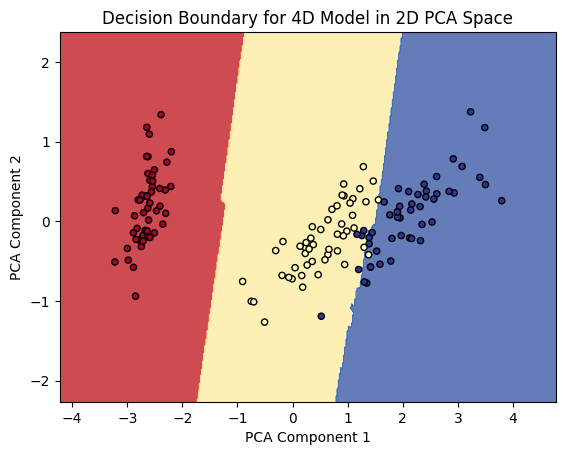

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 결정 경계를 그릴 그리드 생성
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# 그리드에 대한 예측 (원래 4차원 모델을 사용하여 예측)
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_points_orig_space = pca.inverse_transform(grid_points)
Z = clf.predict(grid_points_orig_space)
Z = Z.reshape(xx.shape)

# 결정 경계 플롯
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

# 원본 데이터 (차원 축소된) 플롯
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='k', 
            s=20, cmap=plt.cm.RdYlBu)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Decision Boundary for 4D Model in 2D PCA Space")
plt.show()